# **Satellite Image Classification using Scikit-Learn**
**Author: Krishnagopal Halder**<br>

In this project, I harness the power of Scikit-Learn's Random Forest algorithm to develop a satellite image classification system. My goal is to automatically classify diverse land cover types within satellite images, including urban areas, water bodies, vegetation, and grass. I begin by collecting and preprocessing a labeled dataset, ensuring consistency in quality and format. To enhance model performance and interpretability, I employ Min-Max scaling to normalize feature values. Random Forest model is trained on these scaled features and evaluated using various metrics, with a particular focus on understanding feature importance, which helps us gain insights into the driving factors behind classification decisions. This project not only delivers an accurate image classification solution but also provides valuable insights into the significant features contributing to land cover classification, making it applicable in diverse fields such as environmental monitoring, urban planning, and land use land cover classification.

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import warnings
warnings.filterwarnings("ignore")

## **Read the Imagery**

In [2]:
dataset = rasterio.open(r"D:\Research Works\Dataset\Raster\Landsat_8_Image_Kolkata.tif")

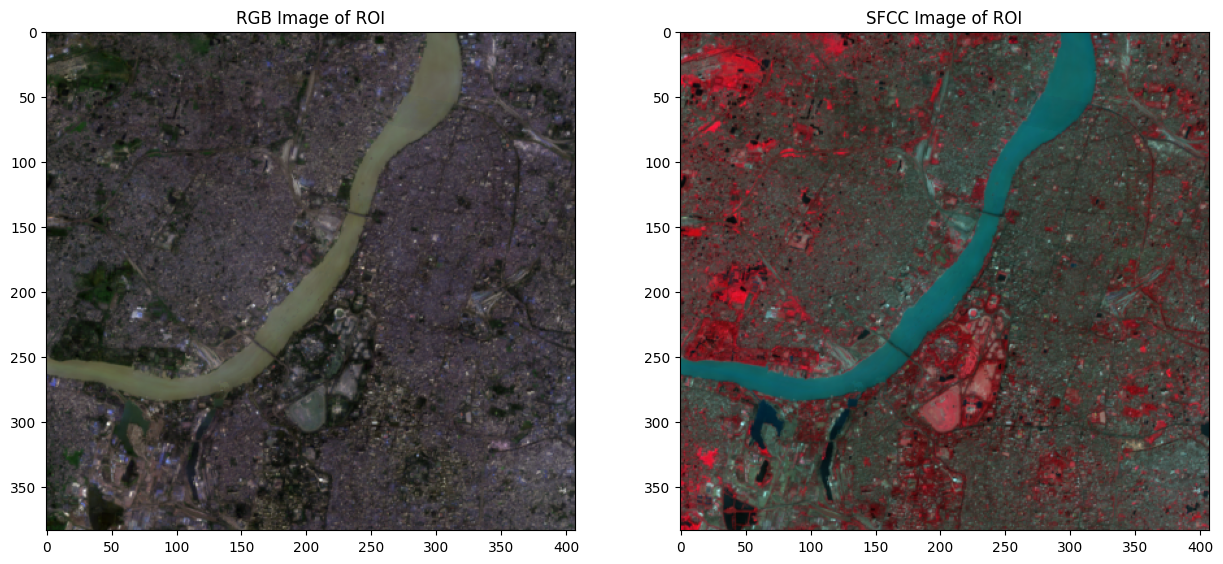

In [3]:
# Visualize the 'RGB' and 'SFCC' image

# Create a function to Normalize the bands
def normalize(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min) / (band_max - band_min))

# Apply the normalize function over the bands
band_5 = normalize(dataset.read(5))
band_4 = normalize(dataset.read(4))
band_3 = normalize(dataset.read(3))
band_2 = normalize(dataset.read(2))

# Create the 'RGB' and 'SFCC' Image
rgb = np.dstack((band_4, band_3, band_2))
sfcc = np.dstack((band_5, band_4, band_3))

# Display the images
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))
ax1.imshow(rgb)
ax1.set_title("RGB Image of ROI")

ax2.imshow(sfcc)
ax2.set_title("SFCC Image of ROI")
plt.show()

In [4]:
# Creating a empty pandas dataframe to store the pixel values
dataset_bands = pd.DataFrame()

In [5]:
# Joining the pixel values of different bands into the dataframe
for i in dataset.indexes:
    temp = dataset.read(i)
    temp = pd.DataFrame(data=np.array(temp).flatten(), columns=[i])
    dataset_bands = temp.join(dataset_bands)

In [6]:
dataset_bands

,12,11,10,9,8,7,6,5,4,3,2,1
0,NaN,0.321847,-0.153173,-0.421723,0.568973,0.100548,0.174385,0.237470,0.065238,0.070930,0.043513,0.036060
1,NaN,0.279090,-0.112361,-0.403544,0.526271,0.102775,0.166520,0.208678,0.064770,0.070765,0.045355,0.035565
2,NaN,0.311859,-0.215919,-0.351209,0.624192,0.076210,0.130770,0.202792,0.046923,0.062790,0.039085,0.031082
3,NaN,0.308468,-0.250054,-0.320704,0.641045,0.063972,0.116250,0.193773,0.042385,0.059792,0.037380,0.032018
4,NaN,0.276197,-0.197561,-0.329241,0.594227,0.073377,0.119908,0.178950,0.045547,0.060507,0.034630,0.025940
...,...,...,...,...,...,...,...,...,...,...,...,...
156283,NaN,0.124976,-0.003031,-0.242292,0.236279,0.133094,0.167331,0.168349,0.103999,0.102060,0.078575,0.065251
156284,NaN,0.215870,-0.070738,-0.305872,0.379282,0.137631,0.182979,0.210836,0.094882,0.097261,0.074065,0.061773
156285,NaN,0.166889,-0.028470,-0.280040,0.329219,0.118079,0.160236,0.169627,0.085601,0.090125,0.071782,0.059572
156286,NaN,0.162100,0.045732,-0.322250,0.278323,0.166699,0.222290,0.202848,0.114517,0.113940,0.095804,0.080514


In [7]:
# Rename the columns
new_column_names = {1:"Coastal", 2:"Blue", 3:"Green", 4:"Red", 5:"NIR", 6:"SWIR1",
                    7:"SWIR2", 8:"NDVI", 9:"MNDWI", 10:"NDBI", 11:"SAVI", 12:"Label"}
dataset_bands.rename(columns=new_column_names, inplace=True)

In [8]:
dataset_bands

,Label,SAVI,NDBI,MNDWI,NDVI,SWIR2,SWIR1,NIR,Red,Green,Blue,Coastal
0,NaN,0.321847,-0.153173,-0.421723,0.568973,0.100548,0.174385,0.237470,0.065238,0.070930,0.043513,0.036060
1,NaN,0.279090,-0.112361,-0.403544,0.526271,0.102775,0.166520,0.208678,0.064770,0.070765,0.045355,0.035565
2,NaN,0.311859,-0.215919,-0.351209,0.624192,0.076210,0.130770,0.202792,0.046923,0.062790,0.039085,0.031082
3,NaN,0.308468,-0.250054,-0.320704,0.641045,0.063972,0.116250,0.193773,0.042385,0.059792,0.037380,0.032018
4,NaN,0.276197,-0.197561,-0.329241,0.594227,0.073377,0.119908,0.178950,0.045547,0.060507,0.034630,0.025940
...,...,...,...,...,...,...,...,...,...,...,...,...
156283,NaN,0.124976,-0.003031,-0.242292,0.236279,0.133094,0.167331,0.168349,0.103999,0.102060,0.078575,0.065251
156284,NaN,0.215870,-0.070738,-0.305872,0.379282,0.137631,0.182979,0.210836,0.094882,0.097261,0.074065,0.061773
156285,NaN,0.166889,-0.028470,-0.280040,0.329219,0.118079,0.160236,0.169627,0.085601,0.090125,0.071782,0.059572
156286,NaN,0.162100,0.045732,-0.322250,0.278323,0.166699,0.222290,0.202848,0.114517,0.113940,0.095804,0.080514


In [9]:
# Changing the order of columns
dataset_bands = dataset_bands[dataset_bands.columns[::-1]]
dataset_bands

,Coastal,Blue,Green,Red,NIR,SWIR1,SWIR2,NDVI,MNDWI,NDBI,SAVI,Label
0,0.036060,0.043513,0.070930,0.065238,0.237470,0.174385,0.100548,0.568973,-0.421723,-0.153173,0.321847,NaN
1,0.035565,0.045355,0.070765,0.064770,0.208678,0.166520,0.102775,0.526271,-0.403544,-0.112361,0.279090,NaN
2,0.031082,0.039085,0.062790,0.046923,0.202792,0.130770,0.076210,0.624192,-0.351209,-0.215919,0.311859,NaN
3,0.032018,0.037380,0.059792,0.042385,0.193773,0.116250,0.063972,0.641045,-0.320704,-0.250054,0.308468,NaN
4,0.025940,0.034630,0.060507,0.045547,0.178950,0.119908,0.073377,0.594227,-0.329241,-0.197561,0.276197,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
156283,0.065251,0.078575,0.102060,0.103999,0.168349,0.167331,0.133094,0.236279,-0.242292,-0.003031,0.124976,NaN
156284,0.061773,0.074065,0.097261,0.094882,0.210836,0.182979,0.137631,0.379282,-0.305872,-0.070738,0.215870,NaN
156285,0.059572,0.071782,0.090125,0.085601,0.169627,0.160236,0.118079,0.329219,-0.280040,-0.028470,0.166889,NaN
156286,0.080514,0.095804,0.113940,0.114517,0.202848,0.222290,0.166699,0.278323,-0.322250,0.045732,0.162100,NaN


## **Data Preprocessing**

### **Apply MinMax Scaler**

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Create an object of the minmax scaler
scaler = MinMaxScaler()

# Fit the data
scaler.fit(dataset_bands.drop("Label", axis=1))

# Transform the data
dataset_bands_scaled = scaler.transform(dataset_bands.drop("Label", axis=1))

In [12]:
# Convert the scaled array into pandas dataframe
dataset_bands_scaled = pd.DataFrame(dataset_bands_scaled, columns=dataset_bands.iloc[:, :-1].columns)
dataset_bands_scaled

,Coastal,Blue,Green,Red,NIR,SWIR1,SWIR2,NDVI,MNDWI,NDBI,SAVI
0,0.158642,0.114184,0.165299,0.170750,0.519670,0.354330,0.207435,0.791427,0.142858,0.497595,0.636310
1,0.154938,0.126415,0.164343,0.168581,0.444916,0.336966,0.212470,0.755603,0.155848,0.539434,0.576934
2,0.121399,0.084794,0.118139,0.085758,0.429637,0.258037,0.152421,0.837751,0.193247,0.433269,0.622440
3,0.128395,0.073476,0.100773,0.064701,0.406219,0.225980,0.124759,0.851889,0.215046,0.398275,0.617732
4,0.082922,0.055221,0.104915,0.079377,0.367735,0.234055,0.146019,0.812613,0.208945,0.452090,0.572917
...,...,...,...,...,...,...,...,...,...,...,...
156283,0.377058,0.346933,0.345654,0.350625,0.340211,0.338757,0.281003,0.512324,0.271079,0.651515,0.362921
156284,0.351029,0.316995,0.317852,0.308321,0.450521,0.373304,0.291260,0.632292,0.225645,0.582105,0.489143
156285,0.334568,0.301844,0.276508,0.265250,0.343531,0.323093,0.247063,0.590293,0.244104,0.625436,0.421124
156286,0.491255,0.461300,0.414483,0.399438,0.429780,0.460095,0.356965,0.547595,0.213941,0.701506,0.414474


In [13]:
# Describe the scaled data
dataset_bands_scaled.describe()

,Coastal,Blue,Green,Red,NIR,SWIR1,SWIR2,NDVI,MNDWI,NDBI,SAVI
count,156288.000000,156288.000000,156288.000000,156288.000000,156288.000000,156288.000000,156288.000000,156288.000000,156288.000000,156288.000000,156288.000000
mean,0.259156,0.228816,0.229303,0.241123,0.293442,0.273496,0.220139,0.551896,0.287817,0.588370,0.383336
std,0.078881,0.077606,0.074753,0.081040,0.113169,0.094997,0.087576,0.160688,0.180060,0.161770,0.135443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210597,0.180449,0.182506,0.191169,0.238683,0.245864,0.179431,0.488487,0.212254,0.534532,0.321110
50%,0.262449,0.231106,0.219868,0.238897,0.282343,0.286998,0.232424,0.548935,0.239315,0.633673,0.370018
75%,0.305658,0.275648,0.263045,0.285477,0.339783,0.321120,0.271648,0.638478,0.273992,0.695099,0.447584
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Exploratory Data Analysis (EDA)**

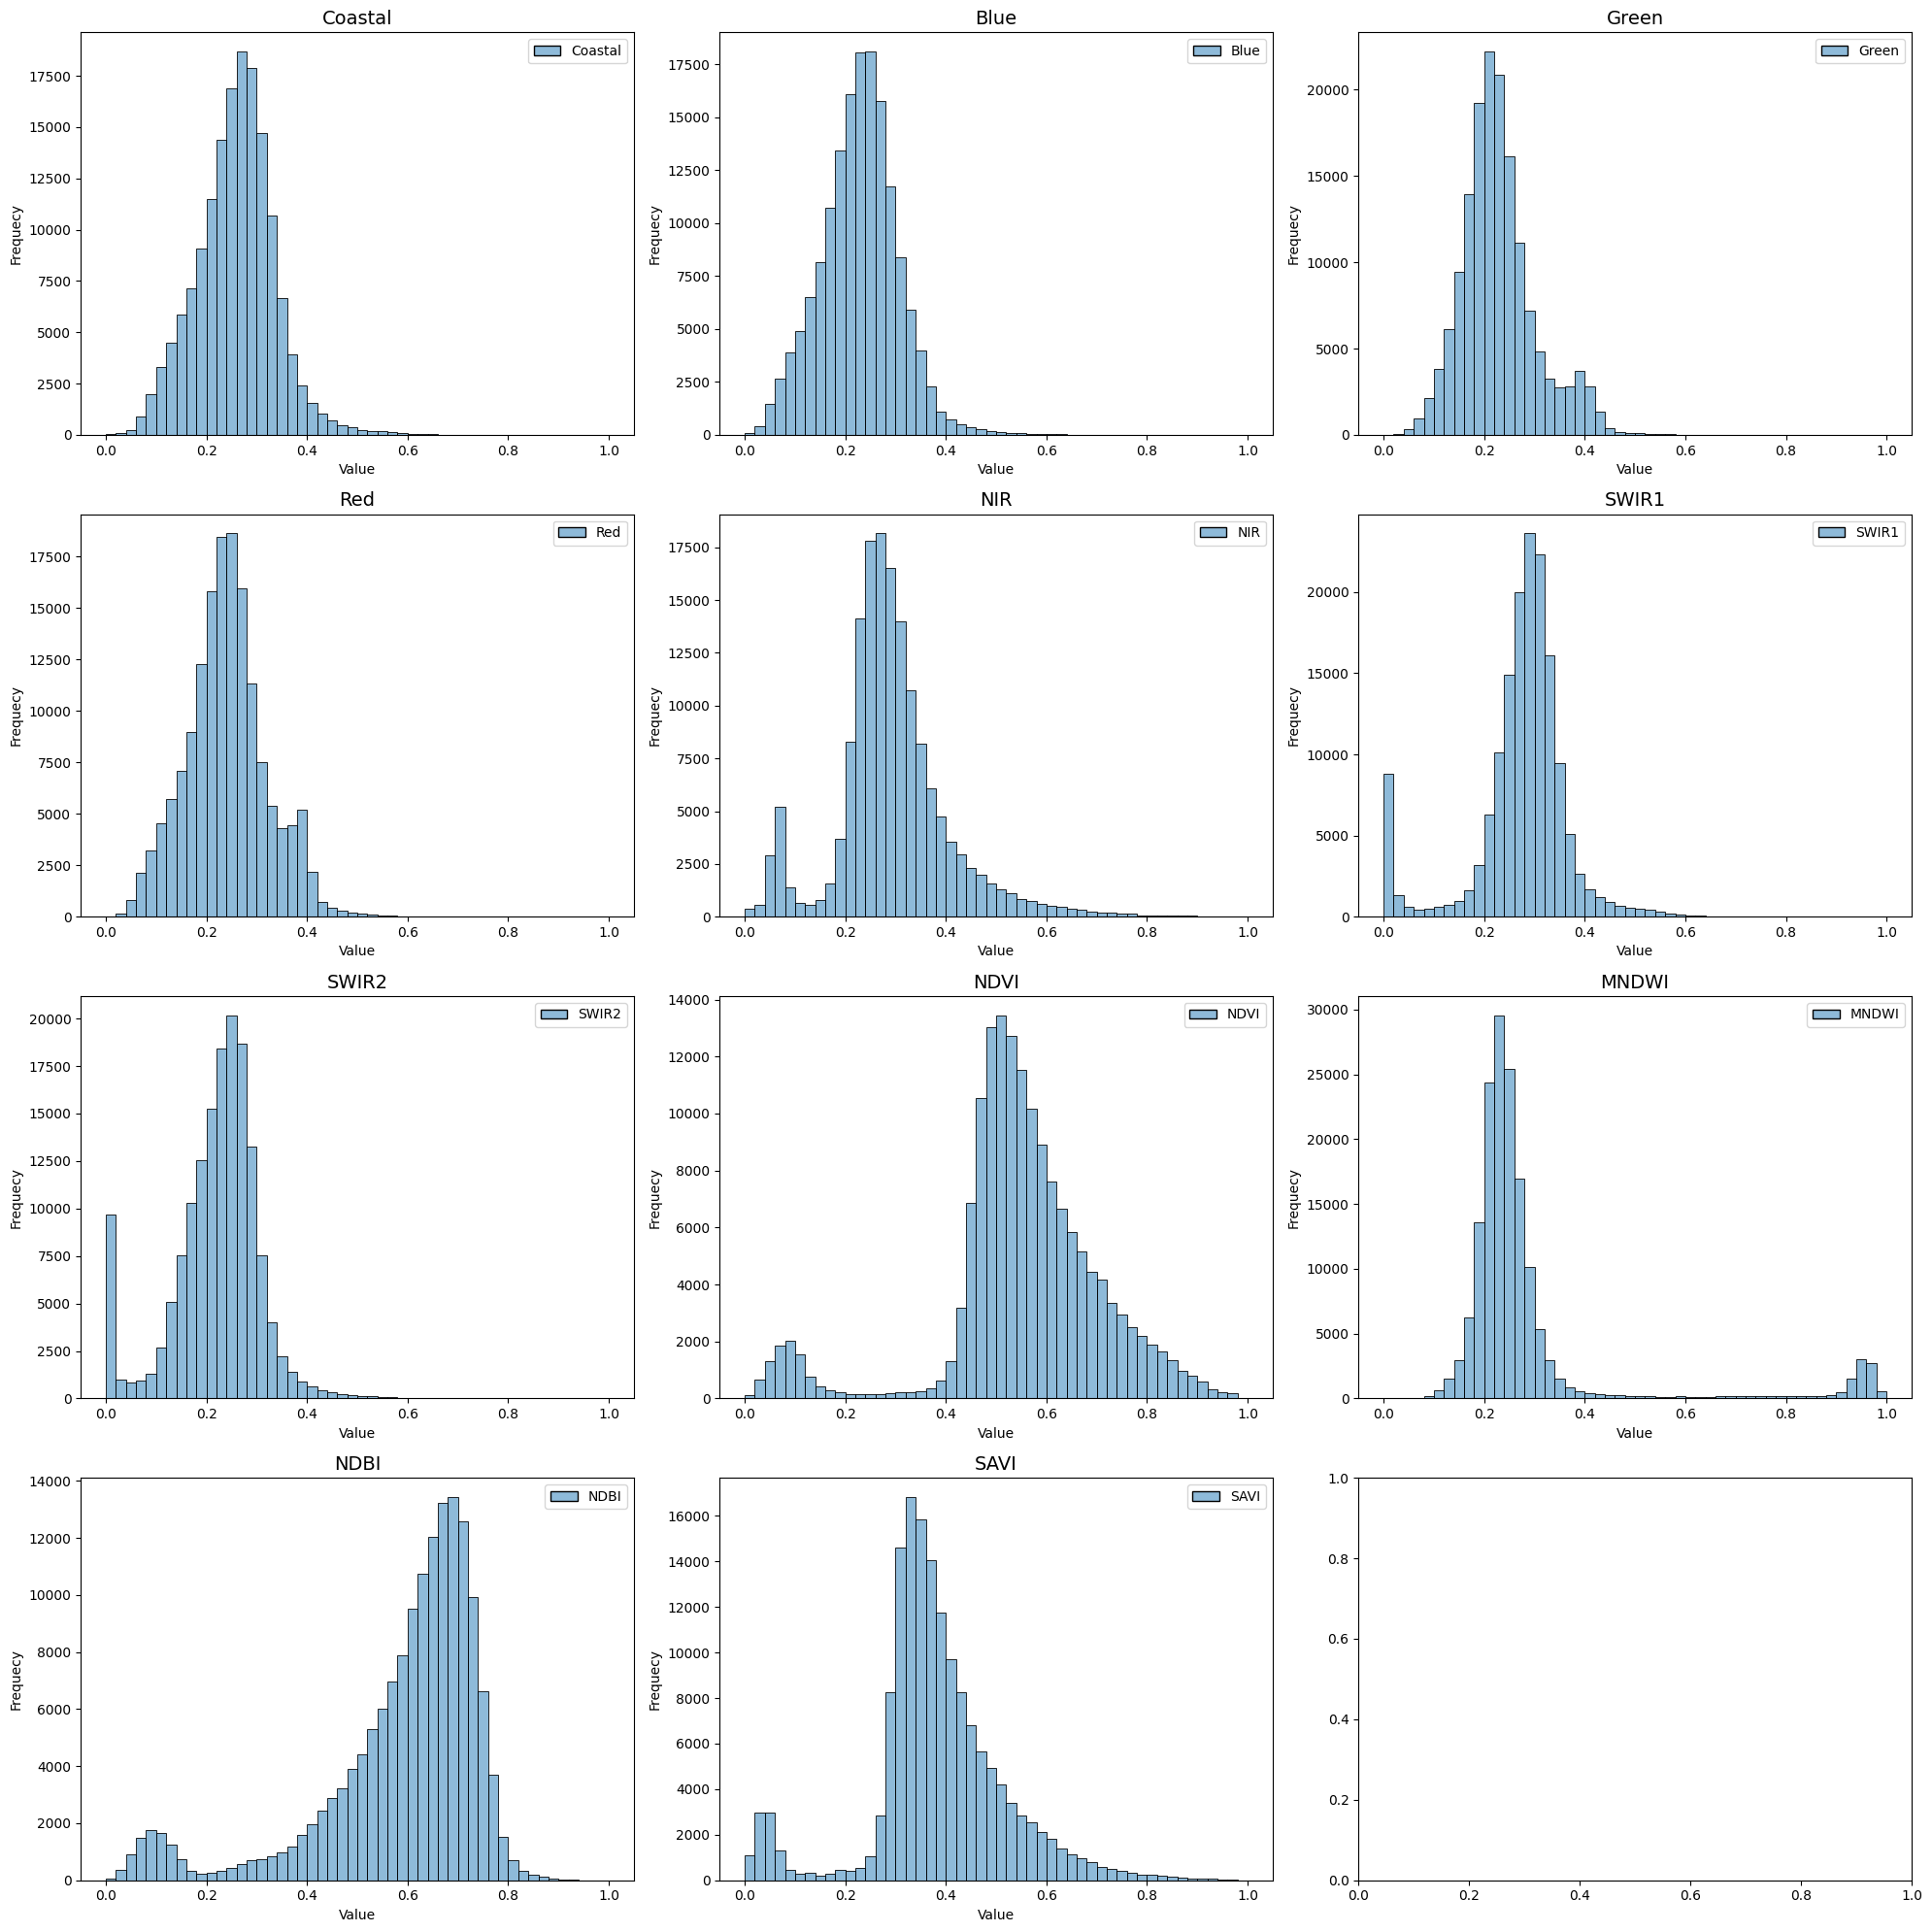

In [14]:
# Plot the Histogram of all the bands
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

# Flatten the axes array to make it easier to access each subplot
axes = axes.flatten()

# Loop through each column and plot its histogram in a subplot
for i, column in enumerate(dataset_bands_scaled.columns):
    ax = axes[i]
    sns.histplot(dataset_bands_scaled[[column]], ax=ax, bins=50)
    ax.set_title(column, fontsize=14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequecy")
    
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

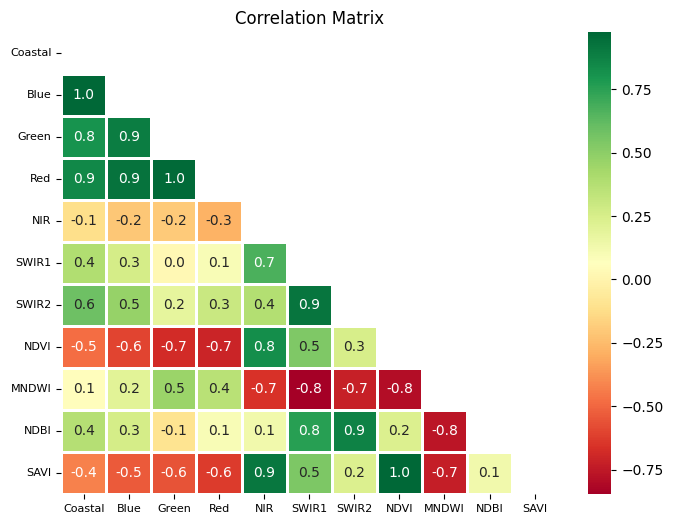

In [15]:
# Plot a heatmap to represent the correlation between bands
plt.figure(figsize=(8, 6))

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(dataset_bands_scaled.corr()))
sns.heatmap(dataset_bands_scaled.corr(), cmap="RdYlGn", mask=mask, 
            linewidth=1, annot=True, fmt=".1f")
plt.title("Correlation Matrix")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## **Prepare the Training Data**

In [16]:
# Create the labeled data
dataset_bands_scaled["Label"] = dataset_bands["Label"]
dataset_bands_scaled

,Coastal,Blue,Green,Red,NIR,SWIR1,SWIR2,NDVI,MNDWI,NDBI,SAVI,Label
0,0.158642,0.114184,0.165299,0.170750,0.519670,0.354330,0.207435,0.791427,0.142858,0.497595,0.636310,NaN
1,0.154938,0.126415,0.164343,0.168581,0.444916,0.336966,0.212470,0.755603,0.155848,0.539434,0.576934,NaN
2,0.121399,0.084794,0.118139,0.085758,0.429637,0.258037,0.152421,0.837751,0.193247,0.433269,0.622440,NaN
3,0.128395,0.073476,0.100773,0.064701,0.406219,0.225980,0.124759,0.851889,0.215046,0.398275,0.617732,NaN
4,0.082922,0.055221,0.104915,0.079377,0.367735,0.234055,0.146019,0.812613,0.208945,0.452090,0.572917,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
156283,0.377058,0.346933,0.345654,0.350625,0.340211,0.338757,0.281003,0.512324,0.271079,0.651515,0.362921,NaN
156284,0.351029,0.316995,0.317852,0.308321,0.450521,0.373304,0.291260,0.632292,0.225645,0.582105,0.489143,NaN
156285,0.334568,0.301844,0.276508,0.265250,0.343531,0.323093,0.247063,0.590293,0.244104,0.625436,0.421124,NaN
156286,0.491255,0.461300,0.414483,0.399438,0.429780,0.460095,0.356965,0.547595,0.213941,0.701506,0.414474,NaN


In [17]:
# Extract the label data with non null values
labeled_data = dataset_bands_scaled.dropna()
labeled_data.head()

,Coastal,Blue,Green,Red,NIR,SWIR1,SWIR2,NDVI,MNDWI,NDBI,SAVI,Label
8028,0.303704,0.323293,0.396718,0.389867,0.081358,0.008864,0.005315,0.111177,0.960055,0.053698,0.055393,2.0
8029,0.300514,0.321285,0.398948,0.390824,0.075682,0.008348,0.005346,0.097728,0.962879,0.060204,0.047665,2.0
8030,0.301749,0.319003,0.393213,0.387187,0.073754,0.007711,0.004786,0.096064,0.964149,0.058426,0.047472,2.0
8031,0.301749,0.319003,0.393213,0.387187,0.073754,0.007711,0.004786,0.096064,0.964149,0.058426,0.047472,2.0
8032,0.305247,0.313436,0.385167,0.387825,0.073326,0.006921,0.004165,0.094601,0.965508,0.052264,0.046536,2.0


In [18]:
# Change the datatype of the 'Label' column
labeled_data["Label"] = labeled_data["Label"].astype(int)
labeled_data.head()

,Coastal,Blue,Green,Red,NIR,SWIR1,SWIR2,NDVI,MNDWI,NDBI,SAVI,Label
8028,0.303704,0.323293,0.396718,0.389867,0.081358,0.008864,0.005315,0.111177,0.960055,0.053698,0.055393,2
8029,0.300514,0.321285,0.398948,0.390824,0.075682,0.008348,0.005346,0.097728,0.962879,0.060204,0.047665,2
8030,0.301749,0.319003,0.393213,0.387187,0.073754,0.007711,0.004786,0.096064,0.964149,0.058426,0.047472,2
8031,0.301749,0.319003,0.393213,0.387187,0.073754,0.007711,0.004786,0.096064,0.964149,0.058426,0.047472,2
8032,0.305247,0.313436,0.385167,0.387825,0.073326,0.006921,0.004165,0.094601,0.965508,0.052264,0.046536,2


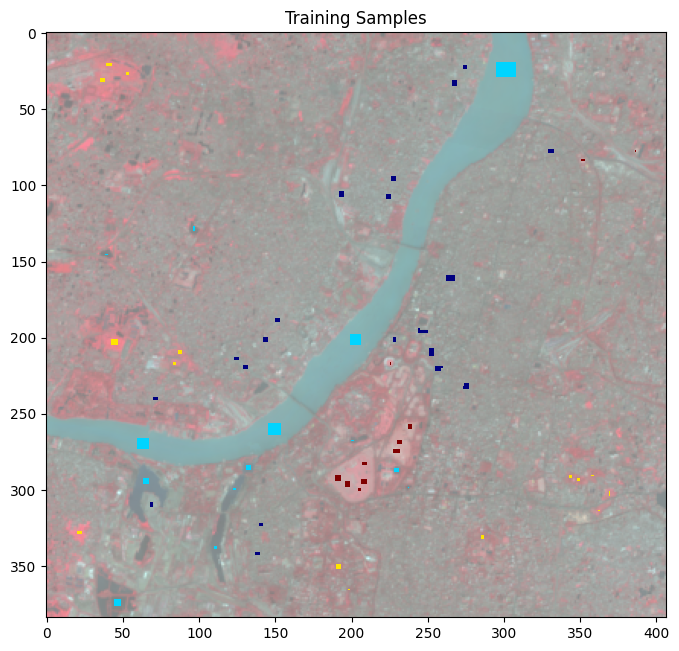

In [19]:
# Plot the training data
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sfcc, alpha=0.5)
ax.imshow(np.array(dataset_bands_scaled["Label"]).reshape(dataset.shape), cmap="jet")
plt.title("Training Samples")
plt.show()

## **Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(labeled_data.drop("Label", axis=1),
                                                    labeled_data["Label"],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((828, 11), (356, 11))

In [22]:
x_train

,Coastal,Blue,Green,Red,NIR,SWIR1,SWIR2,NDVI,MNDWI,NDBI,SAVI
120272,0.357922,0.290343,0.308611,0.281585,0.681030,0.542030,0.330173,0.768369,0.114692,0.580867,0.682732
120682,0.354218,0.278478,0.287421,0.248405,0.694488,0.509547,0.290918,0.797430,0.120176,0.542468,0.712798
82011,0.297325,0.315444,0.373058,0.380487,0.066007,0.017364,0.009511,0.083028,0.916890,0.157477,0.041774
90612,0.189198,0.187203,0.209910,0.233027,0.181279,0.205489,0.176820,0.442686,0.335109,0.653833,0.275863
80429,0.215432,0.206006,0.204652,0.219245,0.211945,0.221274,0.185554,0.500557,0.308645,0.633394,0.319087
...,...,...,...,...,...,...,...,...,...,...,...
121482,0.458539,0.372034,0.329961,0.342075,0.549086,0.566316,0.396096,0.664639,0.113643,0.697275,0.548331
107601,0.262757,0.277108,0.351310,0.345904,0.056726,0.006527,0.007024,0.087375,0.957928,0.084002,0.051514
110359,0.285597,0.305951,0.414642,0.387634,0.049943,0.003339,0.001430,0.038187,0.988608,0.068486,0.016670
86815,0.271193,0.250091,0.250936,0.282989,0.225439,0.248019,0.230403,0.450485,0.307596,0.663180,0.290719


## **Train a Classifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Create an object of the classifir
classifier = RandomForestClassifier(n_estimators=75,
                                    criterion="gini",
                                    max_depth=8,
                                    min_samples_split=10,
                                    random_state=0)

# Fit the training data
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=75,
                       random_state=0)

## **Feature Importance**

In [25]:
# Extract the feature importance
feature_importance = dict(zip(x_train.columns, classifier.feature_importances_.round(3)))
# Convert the dictionary into a pandas series
feature_importance = pd.Series(feature_importance)

In [26]:
# Sort the feature importance in descending order
feature_importance.sort_values(ascending=False, inplace=True)

In [27]:
feature_importance

SAVI       0.176
SWIR1      0.157
SWIR2      0.145
NIR        0.137
MNDWI      0.118
NDVI       0.082
NDBI       0.075
Blue       0.032
Green      0.030
Red        0.029
Coastal    0.019
dtype: float64

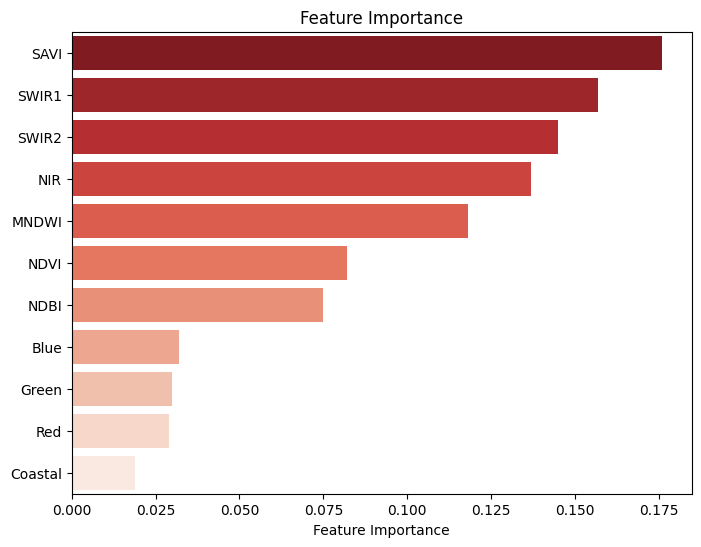

In [28]:
# Plot the feature importance
plt.figure(figsize=(8, 6))

# Reverse the color palette 
color_palette = sns.color_palette("Reds", len(feature_importance))
reversed_palette = color_palette[::-1]

sns.barplot(x=feature_importance, y=feature_importance.index, palette=reversed_palette)
plt.title("Feature Importance")
plt.xlabel("Feature Importance")
plt.show()

## **Model Validation**

In [29]:
# Predict the test data using RF Classifier 
y_pred = classifier.predict(x_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# Print the model validation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        98
           2       1.00      1.00      1.00       156
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        47

    accuracy                           1.00       356
   macro avg       1.00      1.00      1.00       356
weighted avg       1.00      1.00      1.00       356



Text(0.5, 1.0, 'Confusion Matrix')

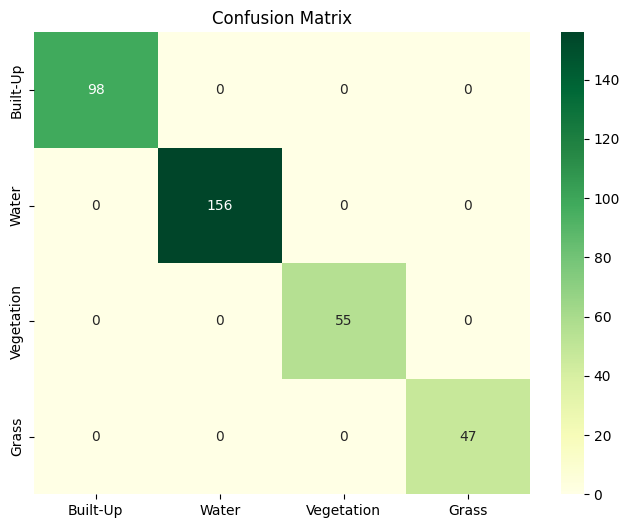

In [32]:
# Plot the confusion matrix
labels = ["Built-Up", "Water", "Vegetation", "Grass"]
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="YlGn", annot=True, fmt="",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")

## **Classify the Imagery**

In [33]:
# Classify the scaled imagery
classified = classifier.predict(dataset_bands_scaled.drop("Label", axis=1))

In [34]:
# Check image dimensions
dataset.shape

(384, 407)

In [35]:
# Reshape the array into image dimensions
classified_array = classified.reshape(dataset.shape)

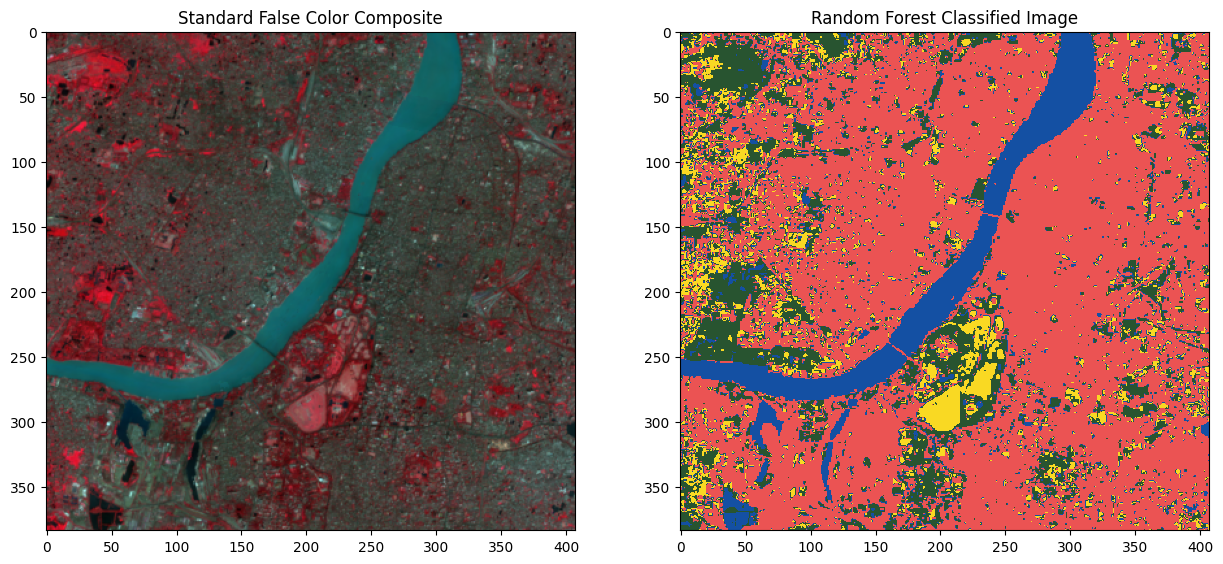

In [36]:
# Plot the SFCC and classified array
import matplotlib.colors as mcolors

# Create a list of color
lulc_color = ["#EB5353", "#1450A3", "#285430", "#F9D923"]
cmap_custom = mcolors.ListedColormap(lulc_color)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15))

ax1.imshow(sfcc)
ax1.set_title("Standard False Color Composite")

ax2.imshow(classified_array, cmap=cmap_custom)
ax2.set_title("Random Forest Classified Image")

# Show the figure
plt.show()